---
title: ACF, PACF, AR models and Stationarity
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Sample PACF

Towards the end of last  lecture, we discussed the Sample PACF (Partial Autocorrelation Function) that is used as an exploratory data analysis tool mainly for determining an appropriate order $p$ for fitting the AR($p$) model to the data. The sample PACF at lag $p$ is simply equal to the esimate $\hat{\phi}_p$ of $\phi_p$ when an AR($p$) model is fit to the data. We also discussed briefly why this quantity (obtained by fitting AR($p$) models for various $p$  is has "partial autocorrelation" in its name). You will revisit this again in tomorrow's lab. 

Now, we shall show code for calculating the sample PACF. We shall calculate it directly by fitting AR(p) models with increasing $p$. We shall also use inbuilt functions from statsmodels to compute the sample PACF, and we will verify that we are getting exactly the same answers. 

Let us use the GNP dataset that was previously used in Lab 10. 

  observation_date      GNP
0       1947-01-01  244.142
1       1947-04-01  247.063
2       1947-07-01  250.716
3       1947-10-01  260.981
4       1948-01-01  267.133


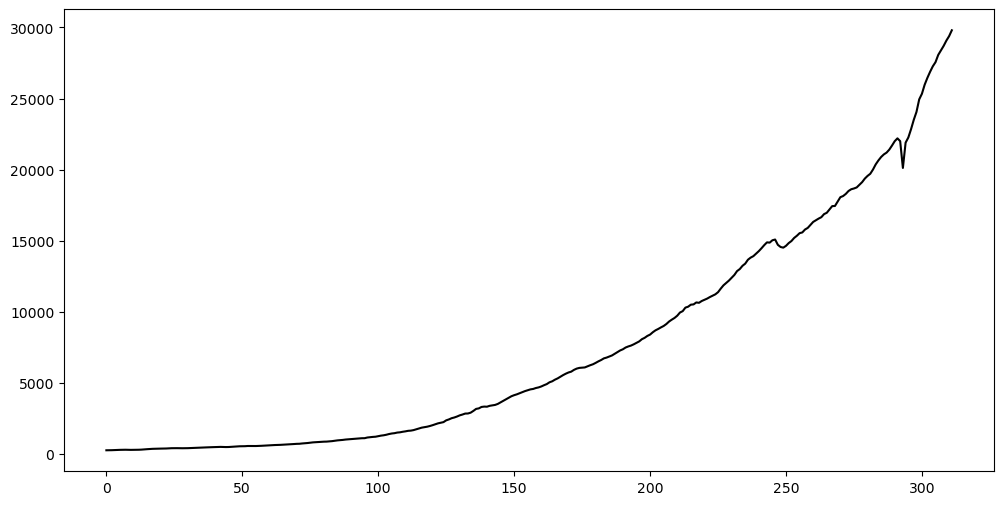

In [2]:
gnp = pd.read_csv("GNP_02April2025.csv")
print(gnp.head())
y = gnp['GNP']
plt.figure(figsize = (12, 6))
plt.plot(y, color = 'black')
plt.show()

Instead of working with the GNP data directly, we shall first take logarithms and then differences. 

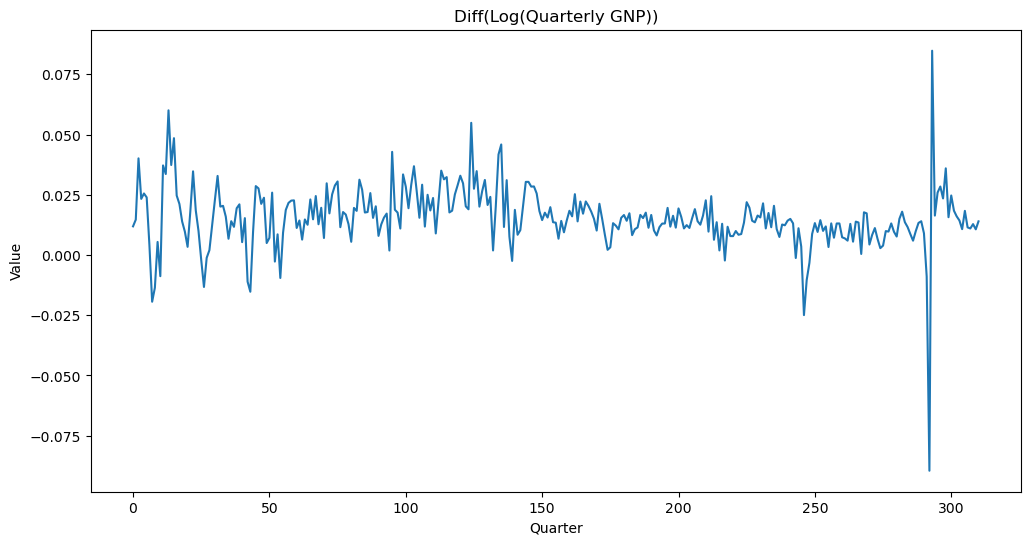

In [3]:
ylogdiff = np.diff(np.log(y))
plt.figure(figsize = (12, 6))
plt.plot(ylogdiff)
plt.title('Diff(Log(Quarterly GNP))')
plt.ylabel('Value')
plt.xlabel('Quarter')
plt.show()

Suppose we want to fit an AR($p$) model to this dataset. What is a suitable value of $p$? To figure this out, we can simply compute the sample PACF. 

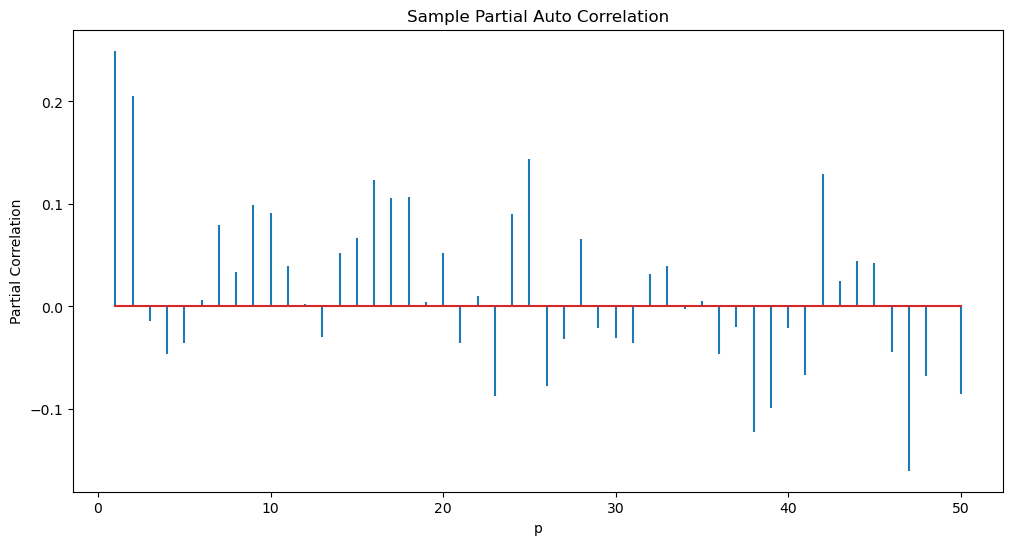

In [4]:
def sample_pacf(y, p_max):
    pautocorr = []
    for p in range(1, p_max + 1):
        armd = AutoReg(ylogdiff, lags = p).fit()
        phi_p = armd.params[-1]
        pautocorr.append(phi_p)
    return pautocorr

p_max = 50 
sample_pacf_vals = sample_pacf(ylogdiff, p_max)
plt.figure(figsize = (12, 6))
markerline, stemline, baseline = plt.stem(range(1, p_max + 1), sample_pacf_vals)
markerline.set_marker("None")
plt.xlabel("p")
plt.ylabel('Partial Correlation')
plt.title("Sample Partial Auto Correlation")
plt.show()

Next let us use an inbuilt function from statsmodels to compute the pacf. 

In [5]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(ylogdiff, nlags=p_max, method = 'ols')
print(np.column_stack([sample_pacf_vals, pacf_values[1:]])) #check that these values match exactly 

[[ 0.2494903   0.2494903 ]
 [ 0.20501251  0.20501251]
 [-0.01395884 -0.01395884]
 [-0.04624678 -0.04624678]
 [-0.03576291 -0.03576291]
 [ 0.00612623  0.00612623]
 [ 0.07954096  0.07954096]
 [ 0.03379382  0.03379382]
 [ 0.09908671  0.09908671]
 [ 0.09148765  0.09148765]
 [ 0.03935477  0.03935477]
 [ 0.00231935  0.00231935]
 [-0.02952129 -0.02952129]
 [ 0.05181593  0.05181593]
 [ 0.0668389   0.0668389 ]
 [ 0.12328399  0.12328399]
 [ 0.10611304  0.10611304]
 [ 0.10657613  0.10657613]
 [ 0.0044102   0.0044102 ]
 [ 0.05242979  0.05242979]
 [-0.03582163 -0.03582163]
 [ 0.01026383  0.01026383]
 [-0.08690484 -0.08690484]
 [ 0.09000221  0.09000221]
 [ 0.1440655   0.1440655 ]
 [-0.07755717 -0.07755717]
 [-0.03216266 -0.03216266]
 [ 0.06553052  0.06553052]
 [-0.02122327 -0.02122327]
 [-0.03054263 -0.03054263]
 [-0.03595624 -0.03595624]
 [ 0.03193371  0.03193371]
 [ 0.03931399  0.03931399]
 [-0.00235186 -0.00235186]
 [ 0.00512543  0.00512543]
 [-0.04618897 -0.04618897]
 [-0.0203755  -0.0203755 ]
 

In comparison to our plot of the sample_pacf values, the inbuilt sample_pacf plot from statsmodels will look slightly different (even though it is plotting the same values). The differences are: (a) it also plots the value 1 at lag 0, (b) it gives a shaded region that can be used to assess whether values are negligible or not. 

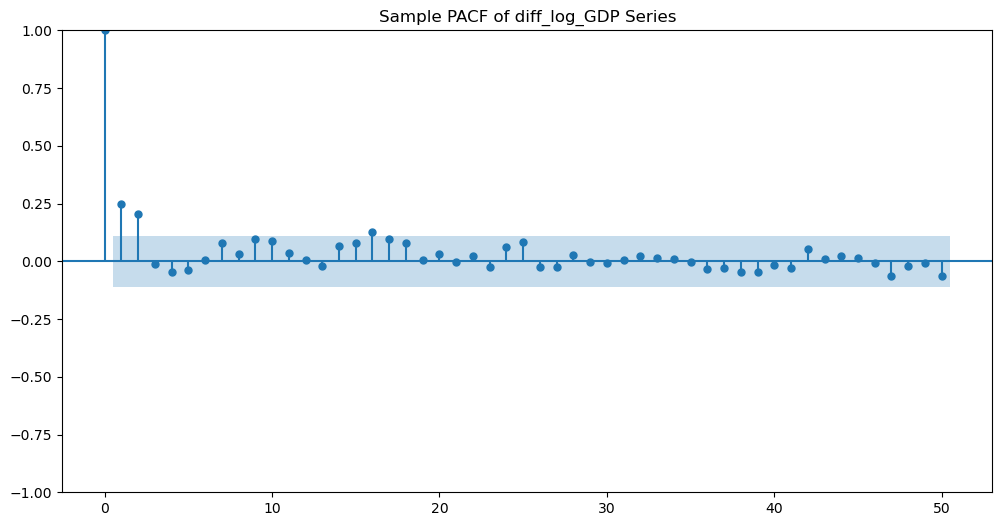

In [6]:
fig, axes = plt.subplots(figsize = (12, 6))
plot_pacf(ylogdiff, lags = p_max, ax = axes)
axes.set_title("Sample PACF of diff_log_GDP Series")
plt.show()

From the above plot, it appears that AR(2) is a good model for this dataset. 

In [7]:
ar2 = AutoReg(ylogdiff, lags = 2).fit()
print(ar2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  311
Model:                     AutoReg(2)   Log Likelihood                 921.191
Method:               Conditional MLE   S.D. of innovations              0.012
Date:                Fri, 11 Apr 2025   AIC                          -1834.381
Time:                        13:06:41   BIC                          -1819.448
Sample:                             2   HQIC                         -1828.411
                                  311                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.001      7.289      0.000       0.007       0.012
y.L1           0.1984      0.056      3.563      0.000       0.089       0.307
y.L2           0.2050      0.056      3.682      0.0

Another way of fitting AR models in statsmodels is to use the ARIMA function, as shown below. 

In [8]:
from statsmodels.tsa.arima.model import ARIMA
ar2_arima = sm.tsa.arima.ARIMA(ylogdiff, order = (2, 0, 0)).fit() #order = (2, 0, 0) refers to the AR(2) model. 
print(ar2_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  311
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 928.043
Date:                Fri, 11 Apr 2025   AIC                          -1848.087
Time:                        13:06:46   BIC                          -1833.128
Sample:                             0   HQIC                         -1842.108
                                - 311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0154      0.001     10.694      0.000       0.013       0.018
ar.L1          0.1981      0.026      7.683      0.000       0.148       0.249
ar.L2          0.2036      0.068      2.996      0.0

Note that the estimates computed by the ARIMA function are slightly different from the estimates computed by the "conditional MLE" method in AutoReg. There are many methods that are used by these functions. Generally they all should give similar answers. 

In [9]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM

## AR(1) with $|\phi_1| > 1$

Consider the model: 
\begin{equation*}
   y_t = \mu - \sum_{j=1}^{\infty} \frac{\epsilon_{t+j}}{\phi_1^j}
\end{equation*}
for some $\phi_1$ with absolute value strictly larger than 1. This is the non-causal AR model. 

Let us attempt to simulate data from this model. It is most natural to simulate this for decreasing $t = n, n-1, \dots, 1$ (there might be numerical issues with trying to simulate this in the usual way for $t = 1, 2, \dots$ with increasing $t$). 

10.263896524224691
[10.0395212  12.11357735 12.47056656 ...  7.74365861  9.23878741
 10.26389652]


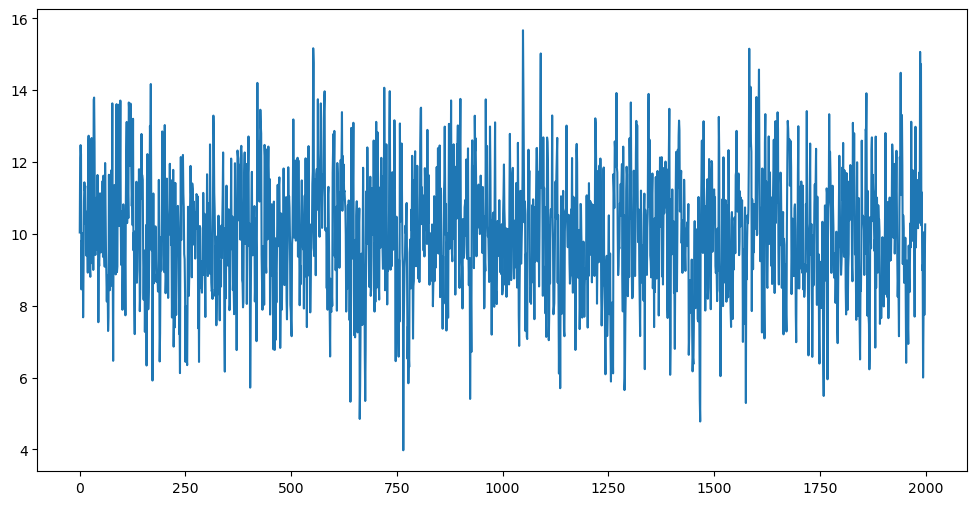

In [12]:
phi1 = 2
sig = 3
mu = 10
n = 2000
nf = 50 #number of future epsilons that we generate

rng = np.random.default_rng(seed = 43)
eps = rng.normal(loc = 0, scale = sig, size = n + nf)
yn = mu
for i in range(1, nf):
    yn = yn - eps[n+i-1]/(phi1 ** i)
print(yn)
y = np.full(n, -999, dtype = float)
y[-1] = yn
for t in range(n-1, 0, -1):
    y[t-1] = (y[t]/phi1) - (mu*(1-phi1)/phi1) - eps[t]/phi1
print(y)

plt.figure(figsize = (12, 6))
plt.plot(y)
plt.show()

In [13]:
ar = ARIMA(y, order = (1, 0, 0)).fit()
print(ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3638.593
Date:                Fri, 11 Apr 2025   AIC                           7283.187
Time:                        13:07:18   BIC                           7299.990
Sample:                             0   HQIC                          7289.356
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0199      0.062    162.683      0.000       9.899      10.141
ar.L1          0.4581      0.020     23.121      0.000       0.419       0.497
sigma2         2.2268      0.070     31.870      0.0

Note that the estimate of $\phi_1$ in the above regression is $0.4581$ which is quite far from the actual $\phi_1 = 2$ used to generate the data. Also note that the estimate of $\sigma^2$ is 2.2268 while the actual $\sigma^2 = 9$. 